In [1]:
from data import *
import warnings
warnings.filterwarnings("ignore")

path = "Data/Dataset"
recs = Recordings(path)

100%|██████████| 43/43 [04:38<00:00,  6.48s/it]


In [2]:
len(recs)

43

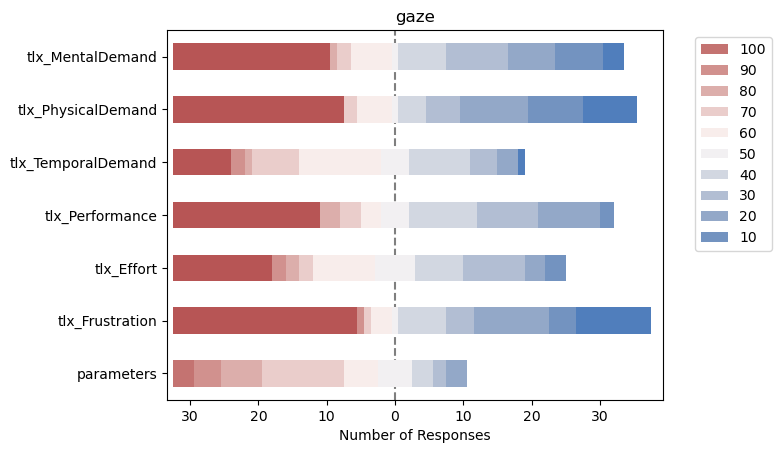

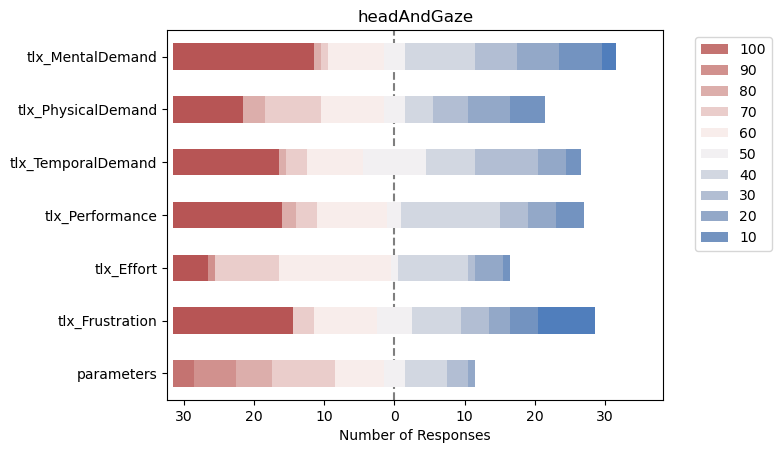

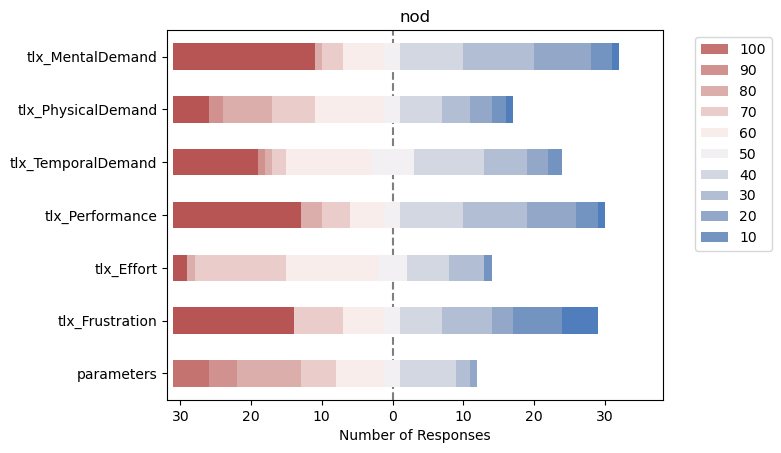

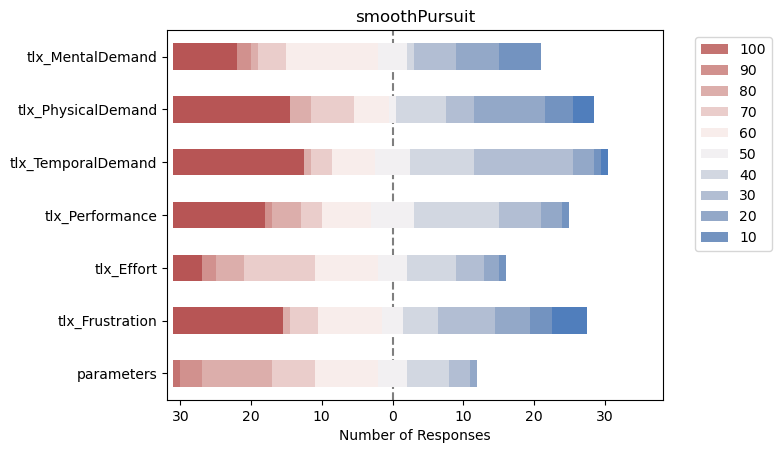

In [3]:
from plot_likert import plot_likert
import matplotlib.pyplot as plt
import seaborn as sns
for condition in Recording.conditions:
    answers = recs.get_answers(condition)# , simulate_answers=False)
    plot_likert(answers, [x*10 for x in range(11)][::-1], colors=sns.color_palette("vlag_r", 12))
    plt.title(condition)
    plt.show()

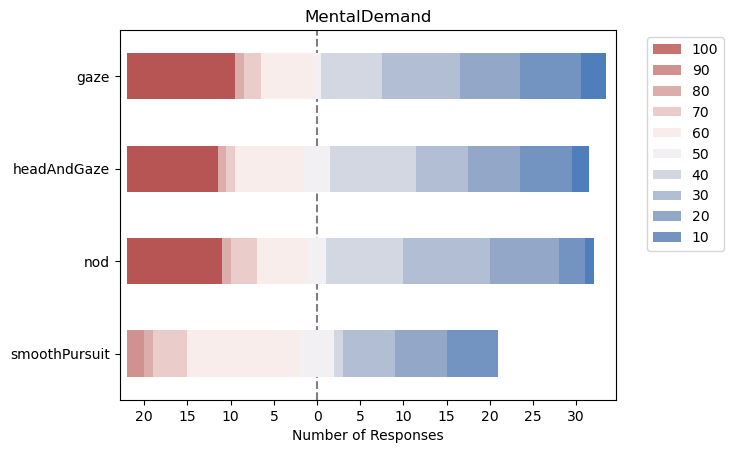

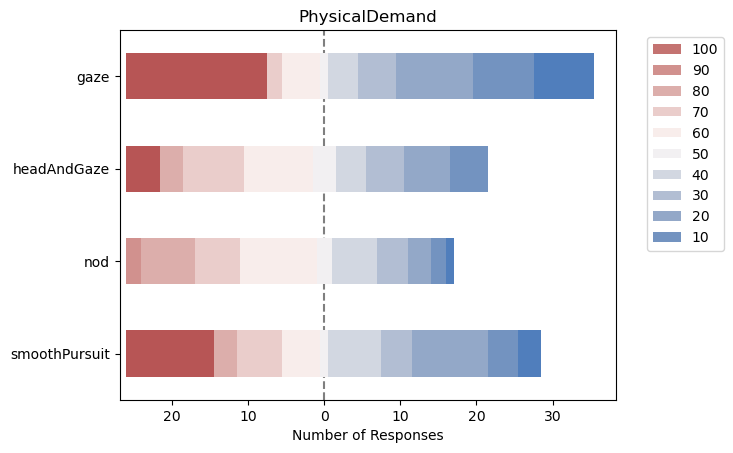

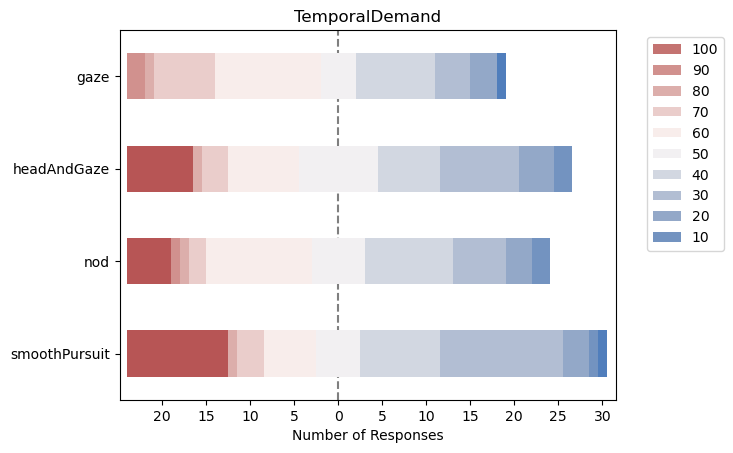

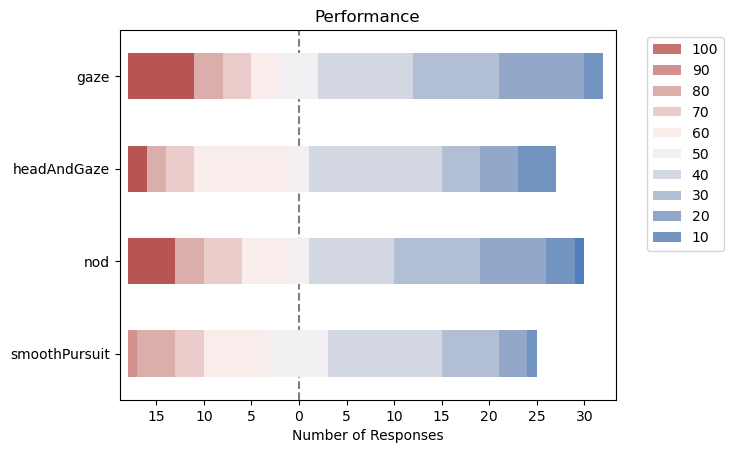

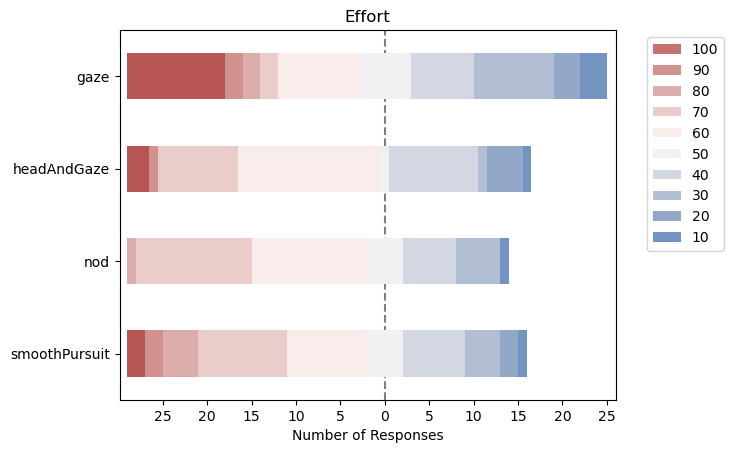

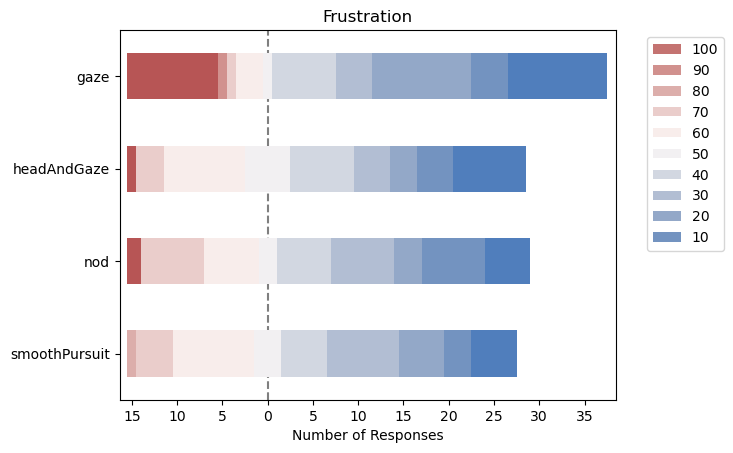

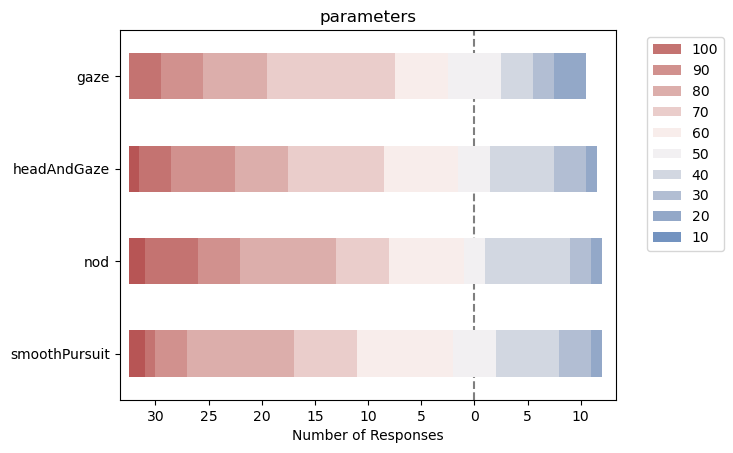

In [4]:
from plot_likert import plot_likert
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import utils
use_z_score = False
answers = recs.get_all_answers(use_z_score=use_z_score)
questions = list(answers[Recording.conditions[0]].keys())
for question in questions:
    summary = dict()
    for cond in Recording.conditions:
        summary[cond] = answers[cond][question]
    plot_likert(pd.DataFrame(summary), [x*10 for x in range(11)][::-1], colors=sns.color_palette("vlag_r", 12))
    plt.title(question.replace("tlx_", ""))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

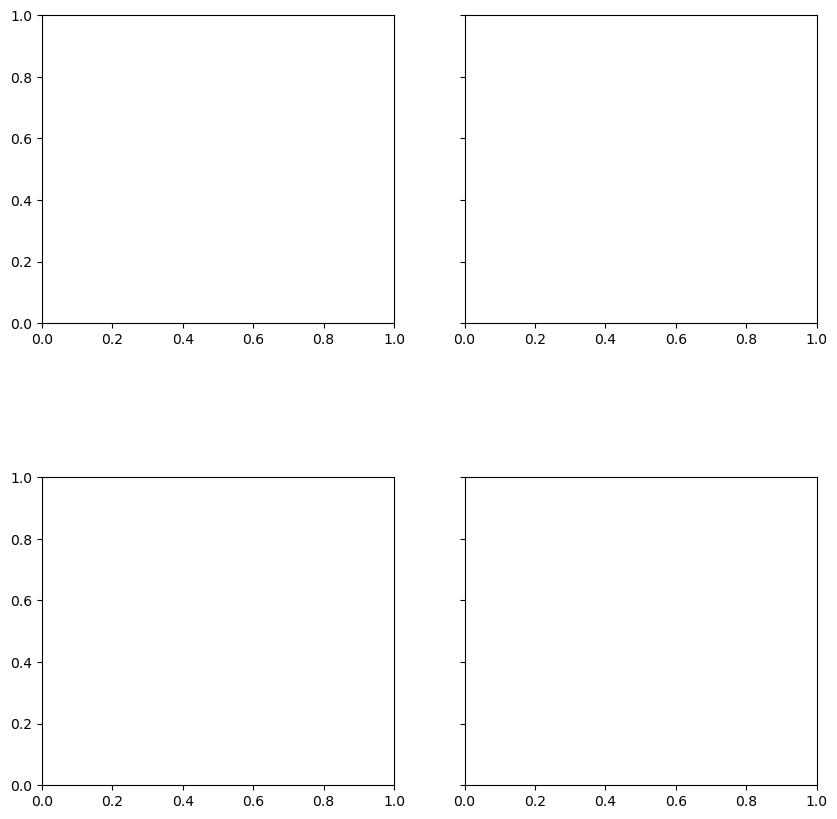

In [5]:
_, axs = plt.subplots(int(len(summary)/2), 2, sharey=True, figsize=(10,10), gridspec_kw={'hspace': 0.5})
axs.flatten()

In [ ]:
summary

{'gaze': [70,
  70,
  80,
  100,
  30,
  80,
  20,
  90,
  50,
  70,
  40,
  70,
  40,
  60,
  100,
  70,
  70,
  50,
  80,
  60,
  70,
  60,
  90,
  70,
  80,
  70,
  30,
  70,
  20,
  70,
  50,
  80,
  60,
  100,
  70,
  20,
  50,
  50,
  80,
  40,
  90,
  60,
  90],
 'headAndGaze': [70,
  80,
  80,
  100,
  70,
  40,
  20,
  100,
  40,
  70,
  70,
  80,
  70,
  60,
  40,
  60,
  30,
  50,
  30,
  90,
  90,
  60,
  60,
  80,
  90,
  60,
  40,
  70,
  30,
  70,
  50,
  70,
  40,
  90,
  90,
  70,
  60,
  40,
  80,
  50,
  100,
  60,
  90],
 'nod': [70,
  90,
  90,
  100,
  80,
  100,
  30,
  100,
  30,
  50,
  40,
  80,
  80,
  60,
  40,
  40,
  60,
  40,
  20,
  70,
  90,
  60,
  40,
  100,
  100,
  80,
  40,
  70,
  60,
  70,
  80,
  60,
  50,
  80,
  80,
  60,
  40,
  40,
  80,
  60,
  80,
  90,
  70],
 'smoothPursuit': [60,
  70,
  70,
  80,
  70,
  80,
  40,
  60,
  30,
  30,
  60,
  80,
  80,
  50,
  90,
  70,
  80,
  40,
  60,
  40,
  90,
  60,
  60,
  90,
  80,
  40,
  30,
  5

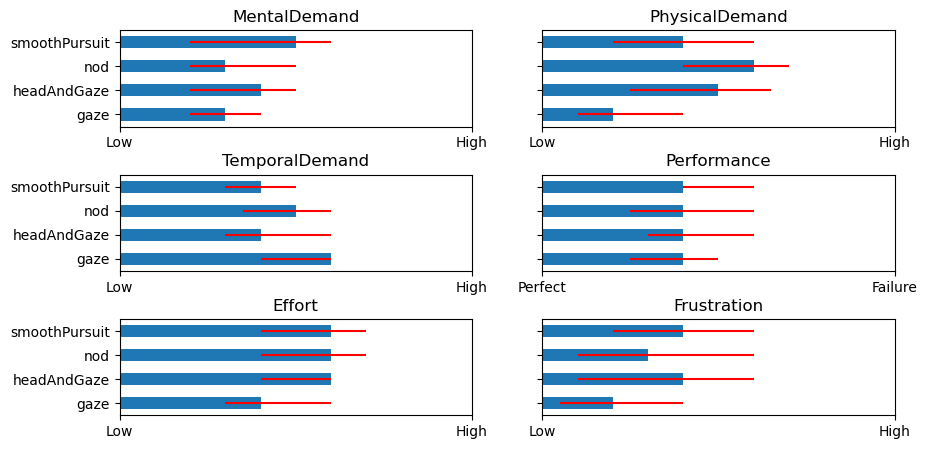

In [7]:
import numpy as np
import pandas as pd
import utils


def calculate_iqr(x):
    q75, q25 = np.percentile(x, [75, 25])
    return q75-q25

use_z_score = False
skip_questions = ["parameters"]
answers = recs.get_all_answers(use_z_score=use_z_score)


summary = dict()
for cond in answers:
    summary[cond] = dict()
    summary[f"{cond}_std"] = dict()
    summary[f"{cond}_25p"] = dict()
    summary[f"{cond}_75p"] = dict()
    for q in answers[cond]:
        if q in skip_questions:
            continue
        summary[cond][q] = np.median(answers[cond][q])  # np.mean(answers[cond][q]) # 
        summary[f"{cond}_std"][q] = calculate_iqr(answers[cond][q])  #  np.std(answers[cond][q])
        summary[f"{cond}_25p"][q] = np.percentile(answers[cond][q], 25)
        summary[f"{cond}_75p"][q] = np.percentile(answers[cond][q], 75)
summary = pd.DataFrame(summary)
_, axs = plt.subplots(int(len(summary)/2), 2, sharey=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
i = 0

# start_color = np.array([8, 171, 29]) / 255
# end_color = np.array([179, 19, 19]) / 255
# grad_color = end_color - start_color
# color_scaling = lambda x: 1 / (1 + (x / (1-x))**(-2))

def get_color(x):
    start = np.array([0, 1, 0])
    end = np.array([1, 0, 0])
    diff = end - start
    return start + x/100 * diff


for question, row in summary.iterrows():
    row[Recording.conditions].plot(
        kind="barh",
        title=question.replace("tlx_", ""),
        # xerr=row[[f"{x}_std" for x in Recording.conditions]],
        # color=[start_color + color_scaling(x/100) * grad_color for x in row[Recording.conditions]],
        # color = [get_color(x) for x in row[Recording.conditions]],
        ax=axs[i]
    )
    axs[i].errorbar(
        row[Recording.conditions], 
        Recording.conditions,
        xerr=np.array([row[Recording.conditions].to_numpy()-row[[f"{x}_25p" for x in Recording.conditions]].to_numpy(),
                       row[[f"{x}_75p" for x in Recording.conditions]].to_numpy()-row[Recording.conditions].to_numpy()]),
        color="red",
        ls="none")
    q = question.replace("tlx_", "")
    axs[i].set_xlim([0, 100])
    if q == "Performance":
        if use_z_score: 
            axs[i].set_xticks([-3, 3], ["Perfect", "Failure"])
        else:
            axs[i].set_xticks([0, 100], ["Perfect", "Failure"])
    else:
        if use_z_score:
            axs[i].set_xticks([-3, 3], ["Low", "High"])
        else:
            axs[i].set_xticks([0, 100], ["Low", "High"])
    # axs[i].set_ylabel(question.replace('tlx_', ''))
    i+=1
plt.savefig("Pictures/QuestionsAnswers.png")
plt.show()

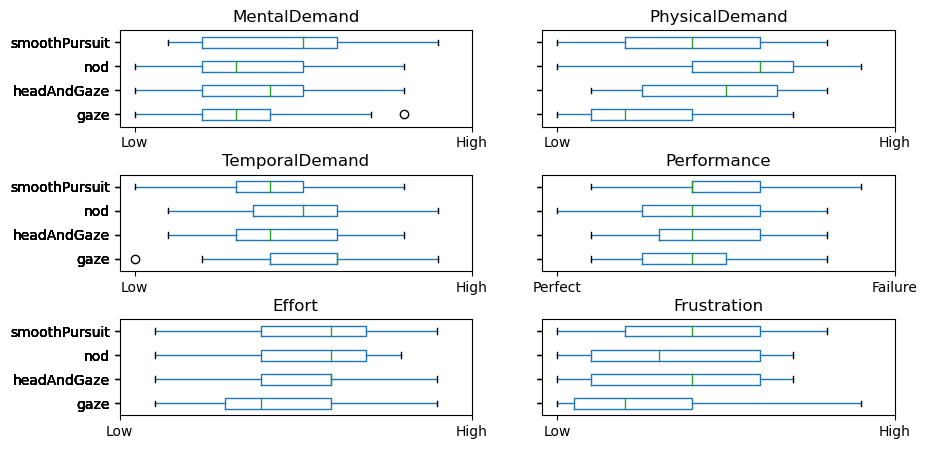

In [8]:
questions = list(answers["gaze"].keys())
_, axs = plt.subplots(int((len(questions)-1)/2), 2, sharey=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
summary_answers = dict()
for q in questions:
    if q in skip_questions:
        continue
    summary_answers[q] = dict()
    for c in Recording.conditions:
        summary_answers[q][c] = answers[c][q]
i=0
for k in summary_answers:
    pd.DataFrame(summary_answers[k]).boxplot(vert=False, ax=axs[i],
                                             grid=False)
    q = k.replace("tlx_", "")
    axs[i].set_title(q)
    if q == "Performance":
        axs[i].set_xticks([0, 100], ["Perfect", "Failure"])
    else:
        axs[i].set_xticks([0, 100], ["Low", "High"])
    i+=1
plt.savefig("Pictures/QuestionsAnswers_box.png")
plt.show()

In [9]:
summary_answers[k].keys()
k

'tlx_Frustration'

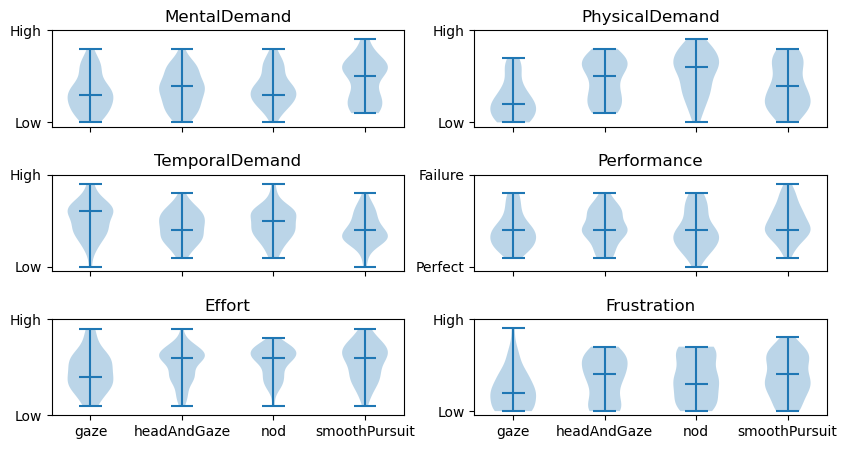

In [10]:
questions = list(answers["gaze"].keys())
_, axs = plt.subplots(int((len(questions)-1)/2), 2, sharex=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
summary_answers = dict()
for q in questions:
    if q in skip_questions:
        continue
    summary_answers[q] = dict()
    for c in Recording.conditions:
        summary_answers[q][c] = answers[c][q]
i=0
for k in summary_answers:
    # pd.DataFrame(summary_answers[k]).violinplot(vert=False, ax=axs[i])
    axs[i].violinplot([summary_answers[k][x] for x in summary_answers[k]], vert=True,
                      showmeans=False,
                      showmedians=True,
                      showextrema=True,
                      # quantiles=[[0.25, .5, 0.75] for _ in range(len(summary_answers[k]))]
                      )
    axs[i].set_xticks([1, 2, 3, 4], list(summary_answers[k].keys()))
    q = k.replace("tlx_", "")
    axs[i].set_title(q)
    if q == "Performance":
        axs[i].set_yticks([0, 100], ["Perfect", "Failure"])
    else:
        axs[i].set_yticks([0, 100], ["Low", "High"])
    i+=1
plt.savefig("Pictures/QuestionsAnswers_box.png")
plt.show()

In [11]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")
answers = recs.get_all_answers(use_z_score=use_z_score)
res = list()
questions = ['tlx_MentalDemand', 'tlx_PhysicalDemand', 'tlx_TemporalDemand', 'tlx_Performance', 'tlx_Effort', 'tlx_Frustration']
for q in questions:
    values = list()
    v, g = list(), list()
    for cond in Recording.conditions:
        values.append(answers[cond][q])
        v.extend(answers[cond][q])
        g.extend([cond]*len(answers[cond][q]))
    f_value, p_value = stats.kruskal(*values)
    # tukeyhsd = pairwise_tukeyhsd(v, g)
    # print(tukeyhsd)
    pvalues_wilkox = sp.posthoc_wilcoxon(pd.DataFrame({
        "Values": v,
        "Groups": g 
        }), val_col="Values", group_col="Groups")
    print("="*80)
    print(" "*30, q)
    print("="*80)
    display(pvalues_wilkox)
    new_res = {
        "Question": q.replace('tlx_', ''),
        "H value": f_value,
        "p value": p_value
    }
    for cond in Recording.conditions:
        new_res[f"{cond}_median"] = np.median(answers[cond][q])
        new_res[f"{cond}_std"] = np.std(answers[cond][q])
    res.append(new_res)
print("="*80)
print(" "*30, "Kruskal")
print("="*80)
pd.DataFrame(res)

                               tlx_MentalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.273087,0.095624,0.000822
headAndGaze,0.273087,1.000000,0.881851,0.007309
nod,0.095624,0.881851,1.000000,0.024638
smoothPursuit,0.000822,0.007309,0.024638,1.000000


                               tlx_PhysicalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000e+00,0.000013,8.454178e-08,0.000030
headAndGaze,1.330060e-05,1.000000,1.778740e-02,0.054887
nod,8.454178e-08,0.017787,1.000000e+00,0.000102
smoothPursuit,2.980136e-05,0.054887,1.017144e-04,1.000000


                               tlx_TemporalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.010839,0.197142,0.002619
headAndGaze,0.010839,1.000000,0.304642,0.180309
nod,0.197142,0.304642,1.000000,0.011397
smoothPursuit,0.002619,0.180309,0.011397,1.000000


                               tlx_Performance


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.104494,0.716132,0.002766
headAndGaze,0.104494,1.000000,0.199990,0.170845
nod,0.716132,0.199990,1.000000,0.009599
smoothPursuit,0.002766,0.170845,0.009599,1.000000


                               tlx_Effort


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.061307,0.018671,0.004174
headAndGaze,0.061307,1.000000,0.357088,0.312803
nod,0.018671,0.357088,1.000000,0.808093
smoothPursuit,0.004174,0.312803,0.808093,1.000000


                               tlx_Frustration


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.001866,0.002562,0.000512
headAndGaze,0.001866,1.000000,0.913145,0.348150
nod,0.002562,0.913145,1.000000,0.531836
smoothPursuit,0.000512,0.348150,0.531836,1.000000


                               Kruskal


,Question,H value,p value,gaze_median,gaze_std,headAndGaze_median,headAndGaze_std,nod_median,nod_std,smoothPursuit_median,smoothPursuit_std
0,MentalDemand,6.214428,0.101631,30.0,20.554772,40.0,19.793417,30.0,18.717680,50.0,23.262790
1,PhysicalDemand,29.719507,0.000002,20.0,20.950894,50.0,22.540151,60.0,23.115858,40.0,24.105411
2,TemporalDemand,8.678995,0.033878,60.0,19.117920,40.0,16.827956,50.0,17.523838,40.0,16.898514
3,Performance,6.071437,0.108186,40.0,18.918858,40.0,18.786898,40.0,20.798032,40.0,18.584291
4,Effort,8.908457,0.030533,40.0,20.265944,60.0,17.499131,60.0,15.607406,60.0,19.326127
5,Frustration,8.721983,0.033225,20.0,21.706534,40.0,23.464183,30.0,23.752829,40.0,22.807303


In [ ]:
res_df = pd.DataFrame(res)
print(res_df[["Question", "H value", "p value"]].round(3).to_latex(index=False))

\begin{tabular}{lrr}
\toprule
      Question &  H value &  p value \\
\midrule
  MentalDemand &    6.214 &    0.102 \\
PhysicalDemand &   29.720 &    0.000 \\
TemporalDemand &    8.679 &    0.034 \\
   Performance &    6.071 &    0.108 \\
        Effort &    8.908 &    0.031 \\
   Frustration &    8.722 &    0.033 \\
\bottomrule
\end{tabular}



In [13]:
import scikit_posthocs as sp
x = [[1,2,3,4,5], [35,31,75,40,21], [10,6,9,6,1]]

df = pd.DataFrame({"Values": v, "Groups": g})
sp.posthoc_wilcoxon(df, val_col="Values", group_col="Groups")

,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.001866,0.002562,0.000512
headAndGaze,0.001866,1.000000,0.913145,0.348150
nod,0.002562,0.913145,1.000000,0.531836
smoothPursuit,0.000512,0.348150,0.531836,1.000000


In [ ]:
recs.get_all_answers()

{'gaze': {'tlx_MentalDemand': [0.0,
   0.8068715304598786,
   -0.9507653770830566,
   0.36273812505500586,
   -0.9979654098963515,
   0.5036101551853347,
   -0.903696114115064,
   0.06711560552140247,
   -0.6172133998483678,
   -0.38995913442395647,
   -0.2839809171235324,
   0.408248290463863,
   -1.034688966508292,
   0.09083405243909483,
   0.3597215394180964,
   0.9128709291752769,
   0.9128709291752769,
   -0.16951587590520273,
   -0.5201564866102993,
   -0.857910095732704,
   1.118033988749895,
   1.2909944487358058,
   -1.267731382092775,
   0.0,
   0.0,
   -1.549826049695167,
   -0.6172133998483678,
   0.3986032682998866,
   0.0,
   1.5,
   0.9890707100936805,
   -0.9680365087282963,
   0.4428074427700475,
   -0.7583649325305192,
   -0.7254762501100117,
   0.14256648712805034,
   0.23063280200722125,
   0.0,
   0.16137430609197578,
   0.38069349381344036,
   -0.4767312946227961,
   -0.1695158759052023,
   -0.816496580927726],
  'tlx_PhysicalDemand': [-0.6454972243679028,
   -1.

In [15]:
recs.calc_events()

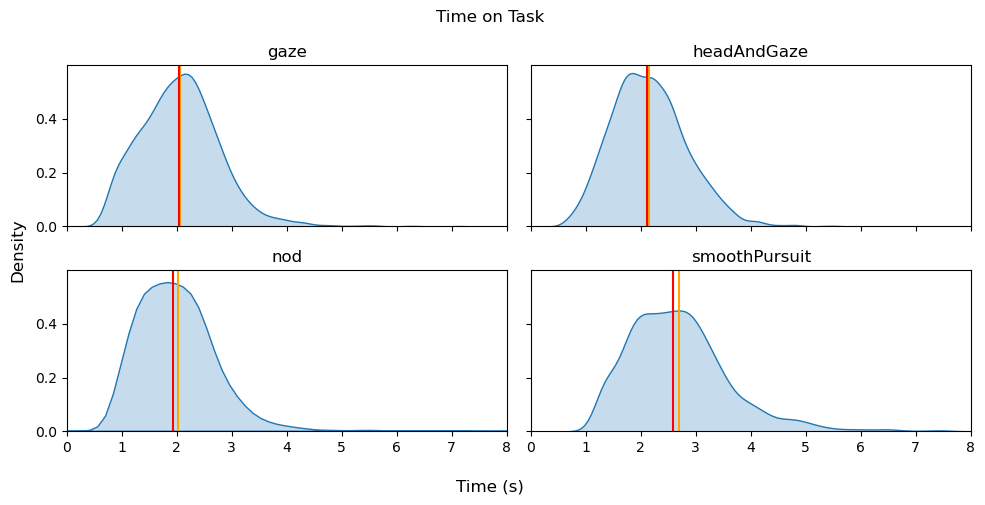

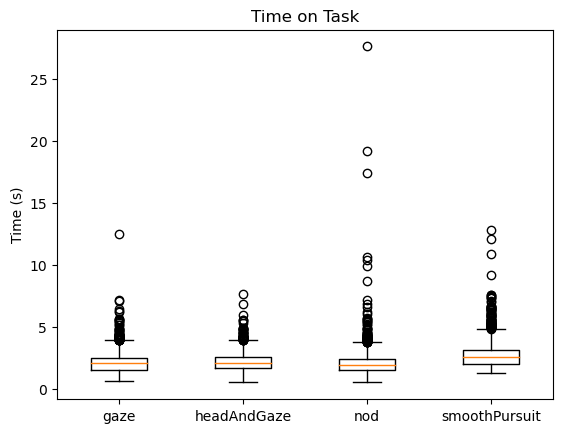

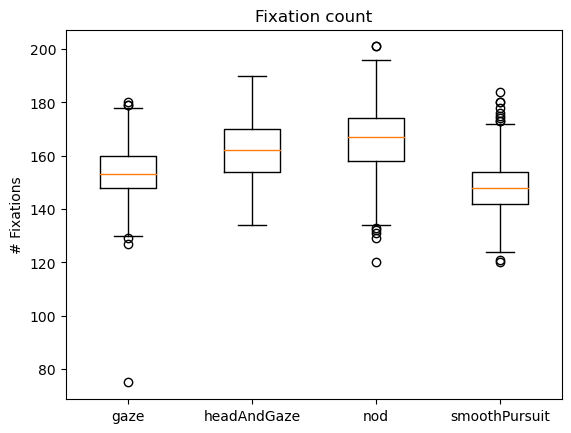

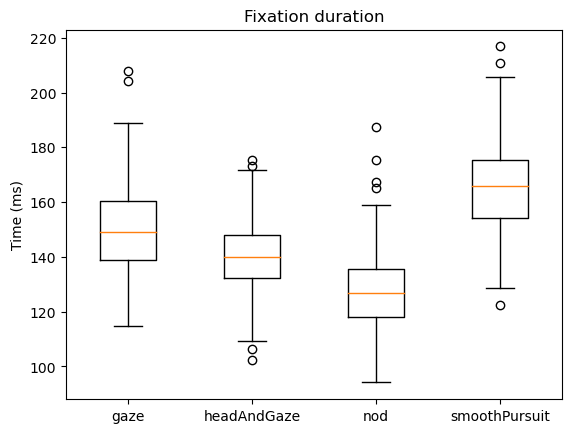

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
fig, axs_temp = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)
axs = [axs_temp[0,0], axs_temp[0, 1], axs_temp[1, 0], axs_temp[1, 1]]
all_time_on_tasks = dict()
all_fixation_count = dict()
all_fixation_duration = dict()
summary = dict()
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition)
    time_on_task = list()
    correct = 0
    incorrect = 0
    points = list()
    fixation_count = list()
    fixation_duration = list()
    for player in round_results:
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task += res["TimeOnTask"]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
            fixation_count.append(res["FixationCount"])
            fixation_duration.append(res["MeanFixationDuration"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i])
    axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    # axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
    axs[i].set_title(condition)
    axs[i].set_ylabel("")
    axs[i].set_xlim([0, 8])
    all_time_on_tasks[condition] = time_on_task
    all_fixation_count[condition] = fixation_count
    all_fixation_duration[condition] = fixation_duration
    summary[condition] = {
        "Mean Time": np.mean(time_on_task),
        "Std Time": np.std(time_on_task),
        # "Median Time": np.median(time_on_task),
        # "Correct": correct,
        "Incorrect": incorrect,
        "Mean Points": np.mean(points),
        "Std Points": np.std(points)
        # "Median Points": np.median(points)
    }
fig.suptitle("Time on Task")
fig.supxlabel("Time (s)")
fig.supylabel("Density")
fig.tight_layout()
plt.savefig("Pictures/TimeOnTask.png")
plt.show()

def create_boxplot(d, title, ylabel):
    _, ax = plt.subplots()
    ax.boxplot(d.values())
    ax.set_xticklabels(d.keys())
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

create_boxplot(all_time_on_tasks, "Time on Task", "Time (s)")
create_boxplot(all_fixation_count, "Fixation count", "# Fixations")
create_boxplot(all_fixation_duration, "Fixation duration", "Time (ms)")

In [17]:
summary_df = pd.DataFrame(summary).transpose()
summary_df["Incorrect"] = summary_df["Incorrect"].astype(int)
summary_df = summary_df.round(3)
display(summary_df)
print(summary_df.to_latex())

,Mean Time,Std Time,Incorrect,Mean Points,Std Points
gaze,2.065,0.748,154,143.233,32.834
headAndGaze,2.152,0.691,59,147.340,26.331
nod,2.016,0.906,104,157.654,30.652
smoothPursuit,2.695,0.967,20,121.552,23.774


\begin{tabular}{lrrrrr}
\toprule
{} &  Mean Time &  Std Time &  Incorrect &  Mean Points &  Std Points \\
\midrule
gaze          &      2.065 &     0.748 &        154 &      143.233 &      32.834 \\
headAndGaze   &      2.152 &     0.691 &         59 &      147.340 &      26.331 \\
nod           &      2.016 &     0.906 &        104 &      157.654 &      30.652 \\
smoothPursuit &      2.695 &     0.967 &         20 &      121.552 &      23.774 \\
\bottomrule
\end{tabular}



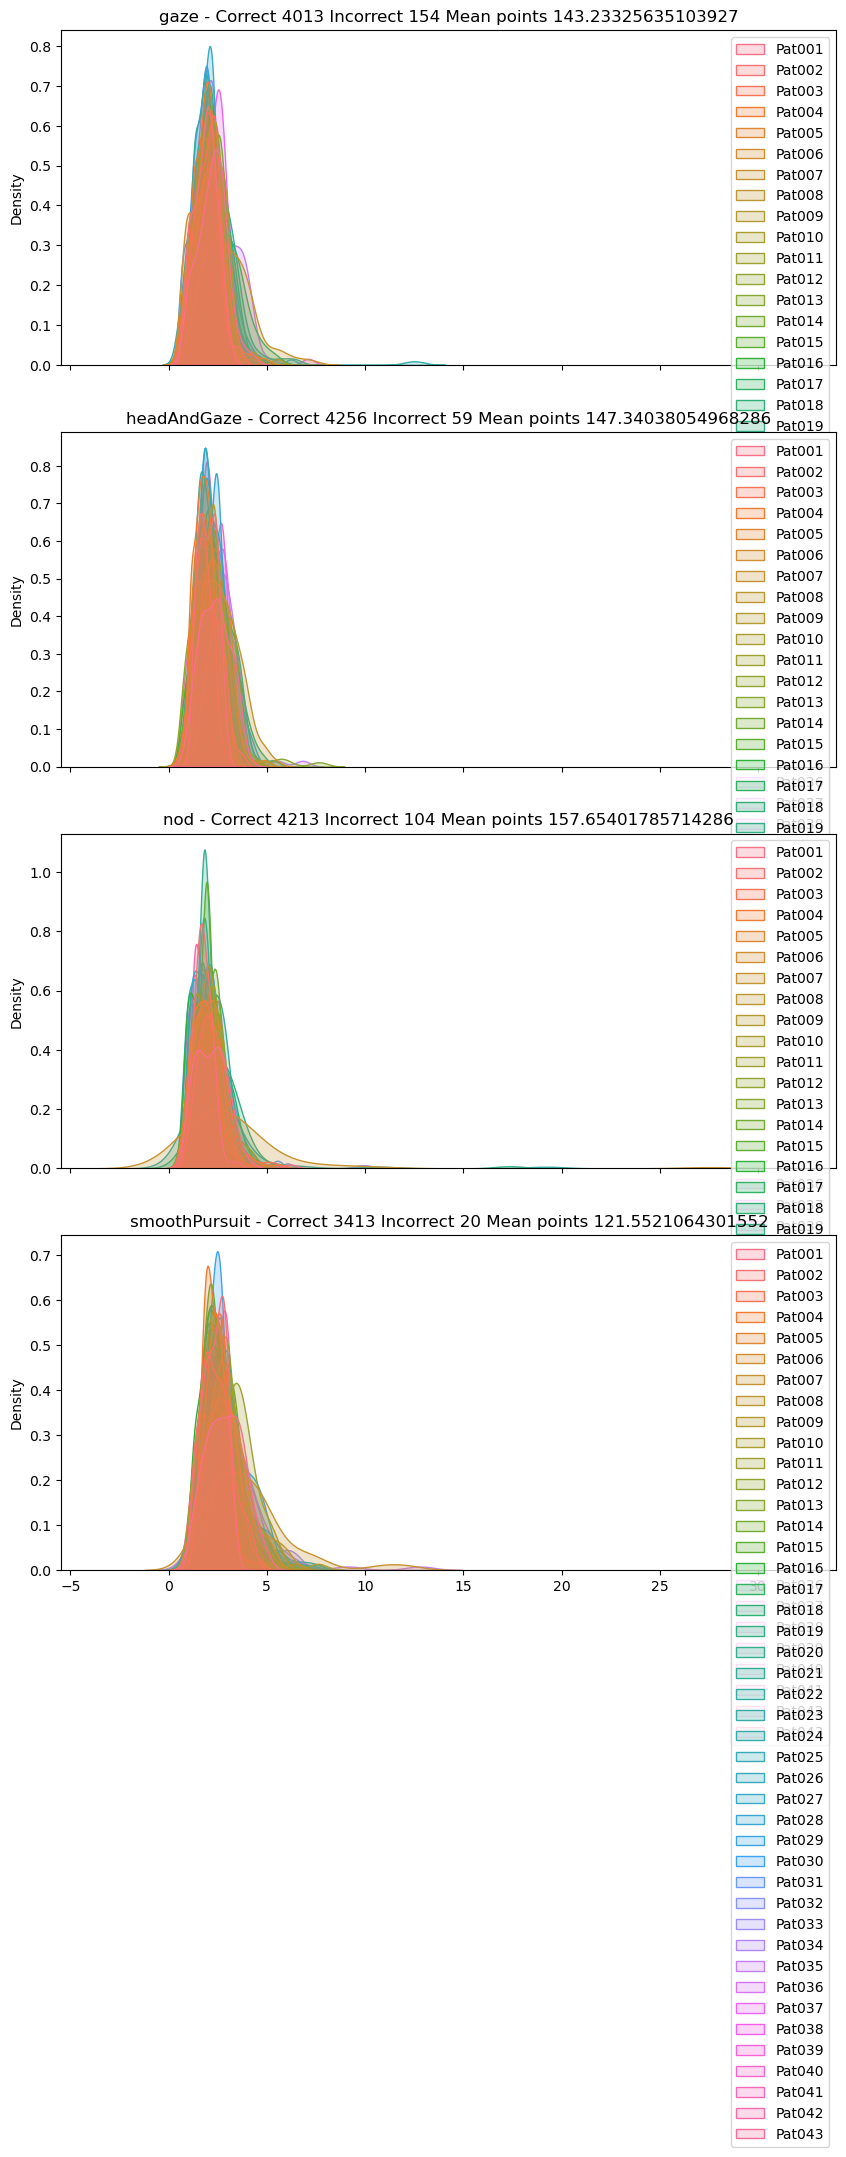

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition)
    time_on_task = dict()
    correct = 0
    incorrect = 0
    points = list()
    for player in round_results:
        time_on_task[player] = list()
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task[player] += res["TimeOnTask"]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i], multiple="layer", common_norm=False)
    # axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    # axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
plt.show()

In [54]:
condition = "headAndGaze"
paras = recs.get_final_parameters(condition)
paras["Incorrect"] = list()
for pat in paras["Participant"]:
    sum_rounds = recs[pat].summarize_rounds(condition)
    incorrect = 0
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
    paras["Incorrect"].append(incorrect)
pd.DataFrame(paras)

,HeadGazeCorrection,DwellTime,Participant,Incorrect
0,10,0.75,Pat001,0
1,20,0.60,Pat002,1
2,4,0.45,Pat003,0
3,6,0.35,Pat004,1
4,4,0.30,Pat005,8
5,16,0.80,Pat006,0
6,10,1.00,Pat007,0
7,12,0.40,Pat008,3
8,10,0.50,Pat009,2
9,10,0.40,Pat010,2


In [62]:
res = dict()
for rec in recs:
    fails = {c: 0 for c in Recording.conditions}
    fails["Total"] = 0
    for cond in Recording.conditions:
        sum_rounds = rec.summarize_rounds(cond)
        for k in sum_rounds:
            fails[cond] += sum_rounds[k]["Incorrect"]
            fails["Total"] += sum_rounds[k]["Incorrect"]
    res[rec.name] = fails
    res[rec.name]["Group"] = rec.group
pd.DataFrame(res).transpose()

,gaze,headAndGaze,nod,smoothPursuit,Total
Pat001,3,0,1,0,4
Pat002,0,1,3,0,4
Pat003,5,0,0,0,5
Pat004,2,1,2,0,5
Pat005,10,8,3,1,22
Pat006,1,0,2,1,4
Pat007,0,0,1,2,3
Pat008,6,3,4,4,17
Pat009,1,2,0,1,4
Pat010,3,2,0,1,6


In [63]:
recs["Pat019"]

Recording of Pat019; Age 63; Gender Female; ET experience False; VR experience True; Visual Aid Glasses; Preferred method Head and gaze.

# Something that does not work... trying linear regresion paras -> incorrects

In [24]:

paras = recs.get_final_parameters("nod")
paras_vali = (np.array(paras["DegreeEnd"]) < np.array(paras["DegreeMove"])) & (np.array(paras["DegreeMove"]) > 8)
pats = recs[list(np.array(paras["Participant"])[paras_vali])]
incorrect = 0
for pat in pats:
    sum_rounds = pat.summarize_rounds("nod")
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
incorrect

12

In [33]:
from sklearn.linear_model import LinearRegression
condition = "nod"
paras = recs.get_final_parameters(condition)
fails = list()
for pat in paras["Participant"]:
    sum_rounds = recs[pat].summarize_rounds(condition)
    incorrect = 0
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
    fails.append(incorrect)
X = np.array([paras["DegreeMove"], paras["DegreeEnd"]]).transpose()
y = np.array(fails)
print(f"{X.shape=}")
print(f"{y.shape=}")
lm = LinearRegression()
lm.fit(X, y)
print("Intercept", lm.intercept_)
print("Coeffs", lm.coef_)
print("R-squere", lm.score(X, y))

X.shape=(43, 2)
y.shape=(43,)
Intercept 5.440841250709019
Coeffs [-0.75011522  0.62903254]
R-squere 0.18849108239663448


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.539
Date:                Mon, 21 Oct 2024   Prob (F-statistic):             0.0233
Time:                        14:26:24   Log-Likelihood:                -101.31
No. Observations:                  43   AIC:                             210.6
Df Residuals:                      39   BIC:                             217.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8199      3.571      0.510      0.6

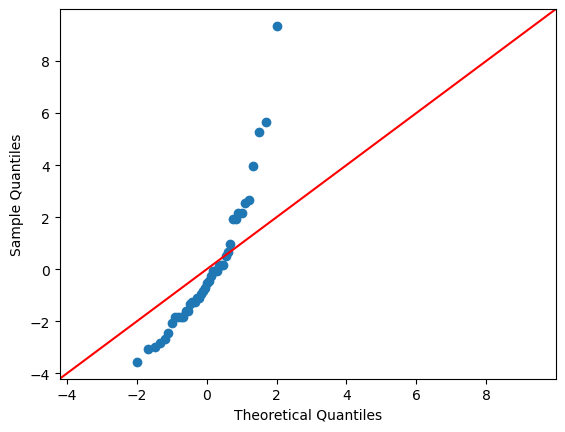

In [49]:
import statsmodels.api as sm
deg_end = np.array(paras["DegreeEnd"])
deg_move = np.array(paras["DegreeMove"])
X = np.array([ deg_end, deg_move, deg_end*deg_move]).transpose()
X_sm = sm.add_constant(X)
lm_sm = sm.OLS(y, X_sm).fit()
print(lm_sm.summary())
residuals = lm_sm.resid
fig, ax = plt.subplots()
sm.qqplot(residuals, ax=ax)
sm.qqline(ax=ax, line="45")

In [29]:
isinstance(np.array(paras["Paticipant"])[paras_vali], np.ndarray)

True

In [20]:
for cond in Recording.conditions: 
    display(pd.DataFrame(recs.get_final_parameters(cond)))

,DwellTime,Paticipant
0,0.70,Pat001
1,0.70,Pat002
2,0.50,Pat003
3,0.45,Pat004
4,0.60,Pat005
5,0.55,Pat006
6,1.00,Pat007
7,0.50,Pat008
8,0.80,Pat009
9,0.65,Pat010


,HeadGazeCorrection,DwellTime,Paticipant
0,10,0.75,Pat001
1,20,0.60,Pat002
2,4,0.45,Pat003
3,6,0.35,Pat004
4,4,0.30,Pat005
5,16,0.80,Pat006
6,10,1.00,Pat007
7,12,0.40,Pat008
8,10,0.50,Pat009
9,10,0.40,Pat010


,DegreeEnd,DegreeMove,Paticipant
0,7,10,Pat001
1,8,8,Pat002
2,1,5,Pat003
3,2,6,Pat004
4,5,6,Pat005
5,2,5,Pat006
6,5,10,Pat007
7,3,6,Pat008
8,5,10,Pat009
9,1,5,Pat010


,CorrelationTH,Shape,Paticipant
0,0.50,bouncing,Pat001
1,0.30,bouncing,Pat002
2,0.15,circle,Pat003
3,0.45,circle,Pat004
4,0.55,bouncing,Pat005
5,0.70,bouncing,Pat006
6,0.50,randomWalk,Pat007
7,0.50,randomWalk,Pat008
8,0.45,randomWalk,Pat009
9,0.05,bouncing,Pat010
